In [1]:
#Mount google drive to save weights to drive and to access test images in drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip -q install wandb
!pip install -q -U ultralytics
!pip install -q 'git+https://github.com/facebookresearch/detectron2.git'
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.7/780.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setu

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import pandas as pd

In [6]:
# Download File from roboflow
!curl -s -L "https://app.roboflow.com/ds/APIKEY" -o roboflow.zip && unzip -o -q roboflow.zip && rm roboflow.zip

In [7]:
src = '/content/drive/MyDrive/clown_yolo8/weights/best.pt'

In [8]:
model = YOLO(src)  # load a custom model

In [9]:
# change the val path to test path in data.yaml for test set evaluation
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75

Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 4.09MB/s]
val: Scanning /content/valid/labels... 34 images, 1 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<00:00, 897.64it/s]

val: New cache created: /content/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.74s/it]


                   all         34         51      0.838       0.81      0.784      0.594      0.827      0.841      0.815      0.611
Speed: 3.0ms preprocess, 130.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/val


0.7482127539997165

In [10]:
df = pd.read_csv("/content/drive/MyDrive/clown_yolo8/results.csv")
df.head()

,epoch,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),metrics/precision(M),metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.2287,2.2111,2.1674,1.2514,0.70158,0.29412,0.45158,0.23836,0.70158,0.29412,0.44751,0.27013,1.7150,4.5910,2.6923,1.2472,0.000620,0.000620,0.000620
1,2,1.0833,1.5462,1.3469,1.1341,0.66956,0.56863,0.59449,0.30444,0.61482,0.54902,0.54074,0.33854,2.1424,5.8783,1.8646,1.9549,0.001247,0.001247,0.001247
2,3,1.1187,1.5959,1.2534,1.1702,0.72149,0.50980,0.51242,0.28056,0.69389,0.54902,0.52280,0.33944,2.5851,12.0640,1.8065,1.6583,0.001862,0.001862,0.001862
3,4,1.1296,1.5858,1.2043,1.1388,0.15858,0.43137,0.11031,0.05372,0.16260,0.43023,0.10690,0.04779,1.9929,5.1104,3.4089,1.5153,0.001941,0.001941,0.001941
4,5,1.1070,1.5157,1.1483,1.1604,0.27938,0.53979,0.28764,0.18764,0.27008,0.52241,0.27784,0.19347,2.4355,4.3256,3.0334,1.6342,0.001921,0.001921,0.001921


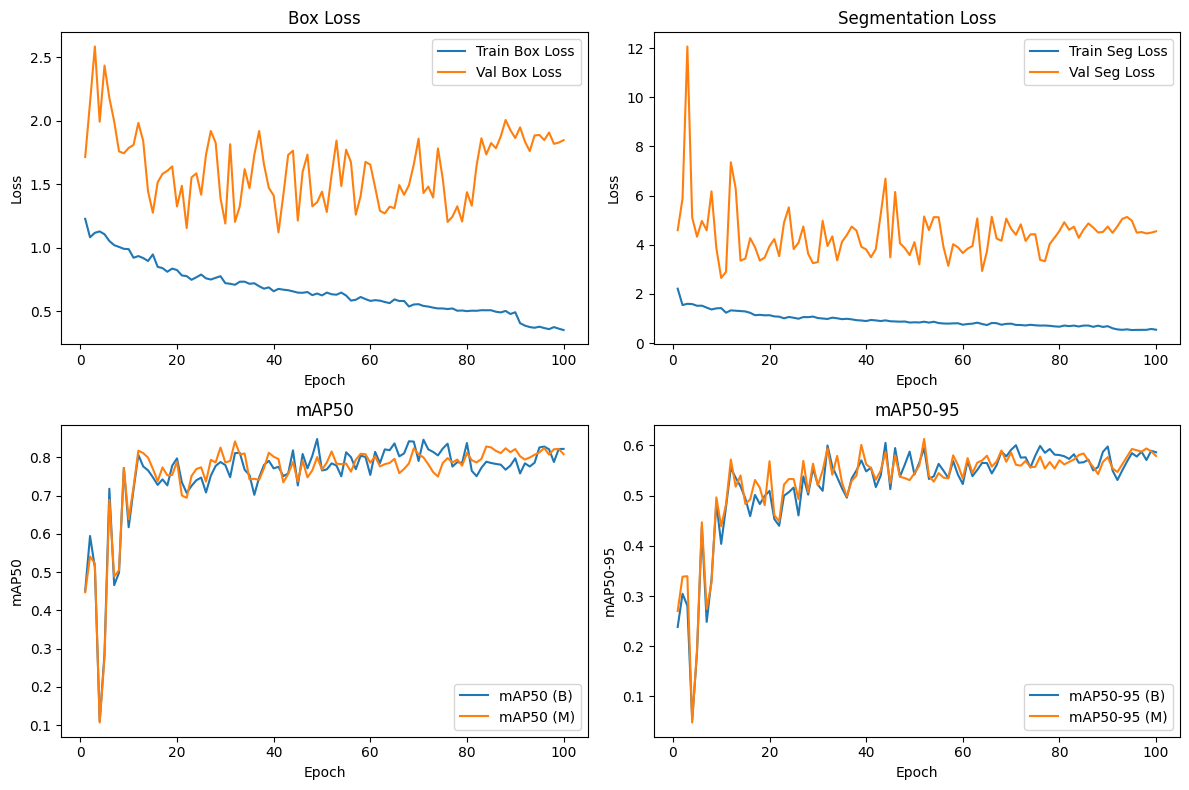

In [12]:
df.columns = [col.strip() for col in df.columns]

# Plot the training and validation losses
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Box Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['epoch'], df['train/seg_loss'], label='Train Seg Loss')
plt.plot(df['epoch'], df['val/seg_loss'], label='Val Seg Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Segmentation Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50 (B)')
plt.plot(df['epoch'], df['metrics/mAP50(M)'], label='mAP50 (M)')
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.title('mAP50')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95 (B)')
plt.plot(df['epoch'], df['metrics/mAP50-95(M)'], label='mAP50-95 (M)')
plt.xlabel('Epoch')
plt.ylabel('mAP50-95')
plt.title('mAP50-95')
plt.legend()

plt.tight_layout()
plt.show()

# Inference

In [16]:
def process_frame(frame):
    """
    Process a single frame (image) using the YOLO model and apply mask and blur.
    """
    results = model(frame)

    for r in results:
        img = r.orig_img  # Get the original image

        # Create an empty mask image
        mask_img = np.zeros_like(img)

        # Check if masks are available
        if r.masks is not None:
            print("Clown Detected")
            masks = r.masks.data  # Get the tensor containing the masks

            # Extract individual masks
            for mask in masks:
                mask = mask.cpu().numpy()  # Convert mask to numpy array
                mask = (mask * 255).astype(np.uint8)  # Convert mask to 8-bit format
                mask = cv2.resize(mask, (img.shape[1], img.shape[0]))  # Resize mask to match image size
                # mask_img[mask > 0] = [255, 255, 255]  # Set mask color to white
                mask_img[mask > 0] = [0, 0, 255]  # Set mask color to white


        # Apply Gaussian blur to the masked areas
        # blurred_img = cv2.GaussianBlur(img, (21, 21), 0)  # Apply Gaussian blur with a kernel size of 21x21
        # combined_img = np.where(mask_img > 0, blurred_img, img)

        combined_img = np.where(mask_img > 0, mask_img, img)


        return combined_img

def process_media(input_path, output_path=None):
    """
    Process an image or video based on the file extension.
    """
    # Determine if the input is an image or a video
    ext = os.path.splitext(input_path)[-1].lower()
    if ext in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']:
        # Process as an image
        img = cv2.imread(input_path)
        processed_img = process_frame(img)

        # Display the image with masks
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Save the processed image if output_path is provided
        if output_path:
            cv2.imwrite(output_path, processed_img)

    elif ext in ['.mp4', '.avi', '.mov', '.mkv']:
        # Process as a video
        # Open the input video
        cap = cv2.VideoCapture(input_path)

        # Get video properties
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')

        # Create a VideoWriter object to save the output video
        if output_path:
            out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

        # Process the video frame by frame
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Process the frame
            processed_frame = process_frame(frame)

            # Write the processed frame to the output video
            if output_path:
                out.write(processed_frame)

        # Release the video objects
        cap.release()
        if output_path:
            out.release()

    else:
        raise ValueError("Unsupported file format: {}".format(ext))

In [20]:
# Example usage for a video
process_media('/content/test_video.mp4', '/content/test_video_blurred_failed.mp4')


0: 128x256 (no detections), 76.7ms
Speed: 1.0ms preprocess, 76.7ms inference, 0.5ms postprocess per image at shape (1, 3, 128, 256)

0: 128x256 (no detections), 36.1ms
Speed: 1.0ms preprocess, 36.1ms inference, 0.3ms postprocess per image at shape (1, 3, 128, 256)

0: 128x256 (no detections), 35.7ms
Speed: 1.0ms preprocess, 35.7ms inference, 0.3ms postprocess per image at shape (1, 3, 128, 256)

0: 128x256 (no detections), 35.3ms
Speed: 1.3ms preprocess, 35.3ms inference, 0.4ms postprocess per image at shape (1, 3, 128, 256)

0: 128x256 (no detections), 38.2ms
Speed: 0.9ms preprocess, 38.2ms inference, 0.3ms postprocess per image at shape (1, 3, 128, 256)

0: 128x256 (no detections), 35.0ms
Speed: 0.9ms preprocess, 35.0ms inference, 0.3ms postprocess per image at shape (1, 3, 128, 256)

0: 128x256 (no detections), 35.2ms
Speed: 1.0ms preprocess, 35.2ms inference, 0.5ms postprocess per image at shape (1, 3, 128, 256)

0: 128x256 (no detections), 36.6ms
Speed: 1.0ms preprocess, 36.6ms i


0: 256x256 1 clown, 106.1ms
Speed: 4.1ms preprocess, 106.1ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 256)
Clown Detected


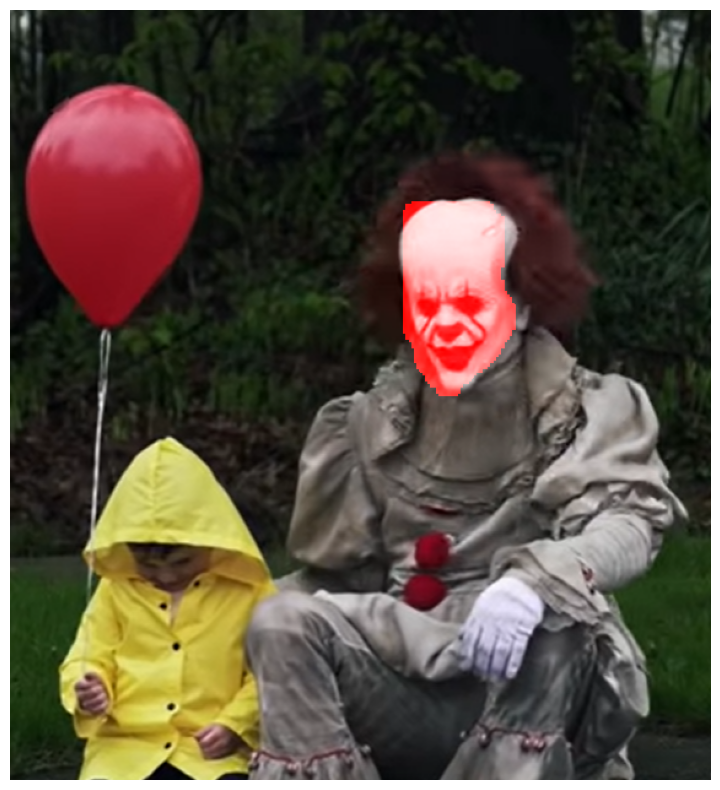

In [17]:
# Example usage for a video
process_media('/content/test_3.png', '/content/test_blurred.png')